In [1]:
import pyod
import sklearn
import matplotlib.pyplot as plt
from matplotlib.pyplot import scatter
import numpy as np

In [2]:
%%html
<h1>3.1 Ex. 1</h1>

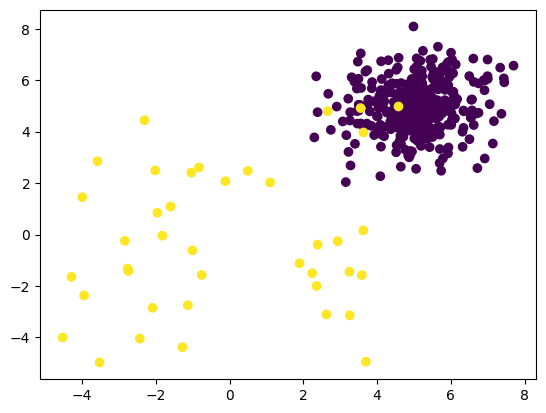

In [3]:
data = pyod.utils.data.generate_data(n_train=400, n_test=100, contamination=0.1, random_state=1)
X_train = data[0]
X_test = data[1]
y_train = data[2]
y_test = data[3]
color_map_train = [2 if label == 1 else 0 for label in y_train]

scatter(X_train[:, 0],
        X_train[:, 1],
        c = color_map_train)
plt.show()

In [4]:
%%html
<h1>3.2 Ex. 2</h1>

In [5]:
from pyod.models.knn import KNN

In [6]:
model = KNN(contamination=0.1)#same contamination as generate_data

In [7]:
y_pred_train = model.fit_predict(X_train, y_train)
y_pred_test = model.predict(X_test)

/Users/fflorete/Desktop/AnomalyDetection/labs/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)
/Users/fflorete/Desktop/AnomalyDetection/labs/.venv/lib/python3.13/site-packages/pyod/models/base.py:554: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

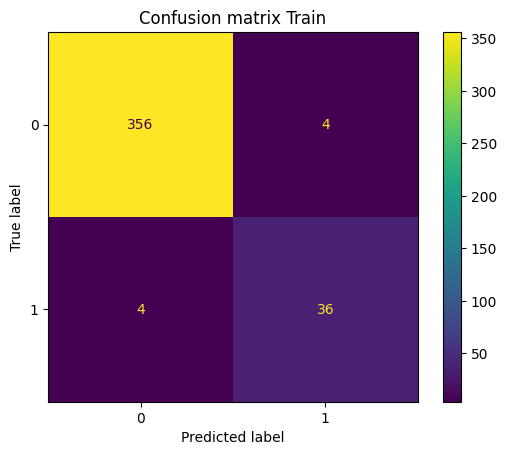

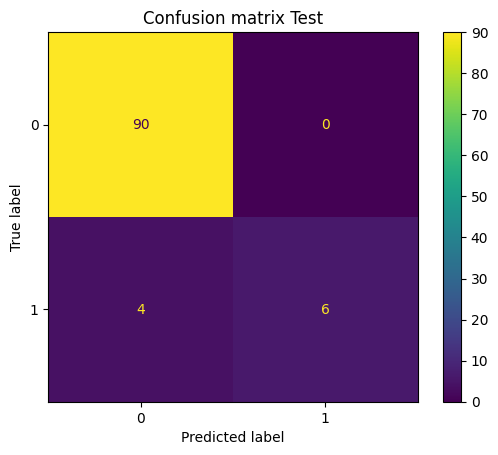


    True negatives train: 356
    True positives train: 36
    False negatives train: 4
    False positives train: 4

    True negatives test: 90
    True positives test: 6
    False negatives test: 4
    False positives test: 0

    Balanced accuracy train: 0.9444444444444444
    Balanced accuracy test: 0.8



In [9]:
ConfusionMatrixDisplay(cm_train).plot()
plt.title("Confusion matrix Train")
plt.show()
ConfusionMatrixDisplay(cm_test).plot()
plt.title("Confusion matrix Test")
plt.show()
TPR_train = (cm_train[1, 1]) / (cm_train[1, 1] + cm_train[1, 0])
TNR_train = (cm_train[0, 0]) / (cm_train[0, 0] + cm_train[0, 1])

TPR_test = (cm_test[1, 1]) / (cm_test[1, 1] + cm_test[1, 0])
TNR_test = (cm_test[0, 0]) / (cm_test[0, 0] + cm_test[0, 1])
print(f"""
    True negatives train: {cm_train[0, 0]}
    True positives train: {cm_train[1, 1]}
    False negatives train: {cm_train[1, 0]}
    False positives train: {cm_train[0, 1]}

    True negatives test: {cm_test[0, 0]}
    True positives test: {cm_test[1, 1]}
    False negatives test: {cm_test[1, 0]}
    False positives test: {cm_test[0, 1]}

    Balanced accuracy train: {(TPR_train + TNR_train) / 2}
    Balanced accuracy test: {(TPR_test + TNR_test) / 2}
""")

In [10]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve

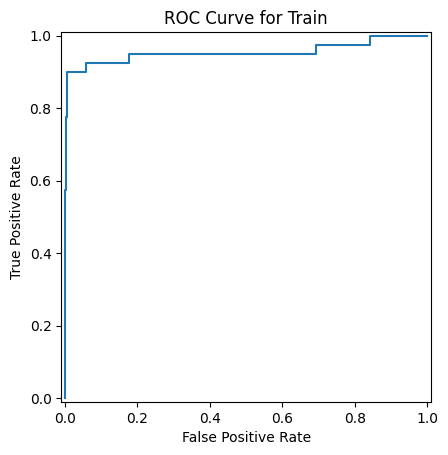

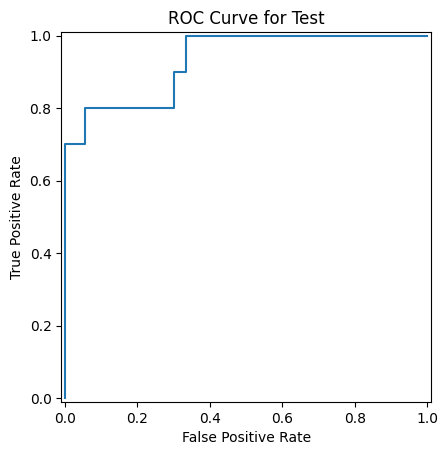

In [11]:
y_train_proba = model.decision_function(X_train)
y_test_proba = model.decision_function(X_test)

fpr, tpr, _ = sklearn.metrics.roc_curve(y_train, y_train_proba)
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.title("ROC Curve for Train")
plt.show()

fpr, tpr, _ = sklearn.metrics.roc_curve(y_test, y_test_proba)
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.title("ROC Curve for Test")
plt.show()

In [12]:
%%html
<h1>Ex. 3</h1>

In [82]:
data = pyod.utils.data.generate_data(n_train=1000, n_test=0, n_features=1, contamination=0.1)
X_train = data[0]
y_train = data[2]

In [98]:
from sklearn.base import BaseEstimator
class ZScoreDetector(BaseEstimator):
    contamination_rate: int
    mean: float
    std: float
    thr: float
    
    def __init__(self, contamination_rate=0.1):
        self.contamination_rate = contamination_rate

    def fit(self, X, y = None):
        self.mean = np.mean(X)
        self.std = np.std(X)
        Z_scores_X = np.abs(X - self.mean) / self.std
        self.thr = np.quantile(Z_scores_X, q=(1 - self.contamination_rate))

    def predict(self, X):
        return np.int32(X < self.thr)

    def fit_predict(self, X, y=None):
        self.fit(X, y)
        return self.predict(X)

In [100]:
detector = ZScoreDetector()
y_train_pred = detector.fit_predict(X_train)

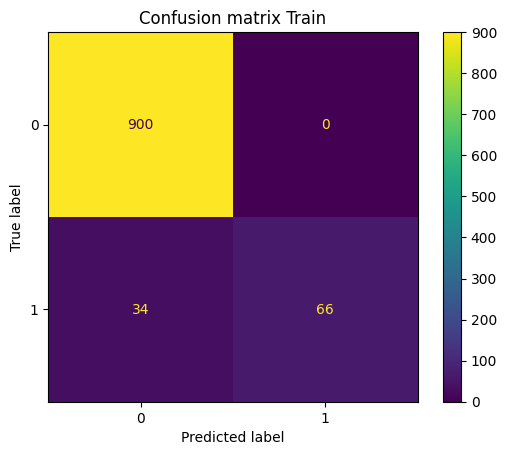


    True negatives train: 900
    True positives train: 66
    False negatives train: 34
    False positives train: 0

    Balanced accuracy train: 0.8300000000000001



In [106]:
cm_train = confusion_matrix(y_train, y_train_pred)
ConfusionMatrixDisplay(cm_train).plot()
plt.title("Confusion matrix Train")
plt.show()
TPR_train = (cm_train[1, 1]) / (cm_train[1, 1] + cm_train[1, 0])
TNR_train = (cm_train[0, 0]) / (cm_train[0, 0] + cm_train[0, 1])
print(f"""
    True negatives train: {cm_train[0, 0]}
    True positives train: {cm_train[1, 1]}
    False negatives train: {cm_train[1, 0]}
    False positives train: {cm_train[0, 1]}

    Balanced accuracy train: {(TPR_train + TNR_train) / 2}
""")

In [107]:
%%html
<h1>Ex. 4</h1>